## 11.2 Simple Monte Carlo Evalution of Integrals


![AndNowForSomethingCompletelyDifferent](https://media.giphy.com/media/1MclE9Kaw3996/giphy.gif)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

Consider

$$ f(x) = 4\sqrt{1-x^2}$$

over the interval [0,1] and so

$$ \int_a^b f(x) dx = \int_0^1 4\sqrt{1-x^2} dx = \pi $$

In [18]:
f = lambda x: 4*np.sqrt(1-x**2)

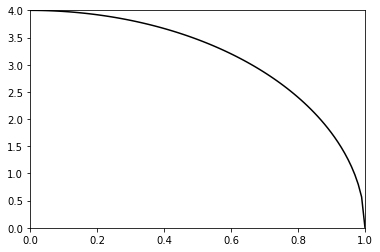

In [37]:
a = 0
b = 1
h = 4
x = np.linspace(a, b, 100)
plt.plot(x, f(x), 'k-')
plt.axis([a, b, 0, h])
plt.show()

Imagine choosing points at random in the domain [a, b] x [0, h].

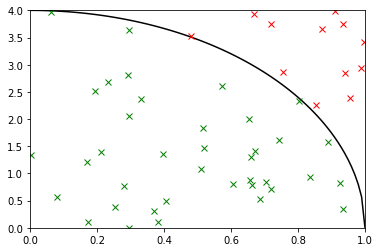

In [59]:
a = 0
b = 1
h = 4
x = np.linspace(a, b, 100)
plt.plot(x, f(x), 'k-')

n = 50
for i in range(n):
    xi = np.random.rand()*(b-a) + a
    yi = np.random.rand()*h
    if yi <= f(xi):
        color = 'g'
    else:
        color = 'r'
    plt.plot(xi, yi, 'x', color=color)

plt.axis([a, b, 0, h])
plt.show()

Some points will randomly be with in the boundary and other outside of the boundary of the curve.

### Hit or miss method

The area of the domain is 

$$ A = h (b - a) $$

and the fraction of points $x_i, y_u$ that satisfy $ y_i \le f(x_i) $ is an estimate of the ratio of the integral of $f(x)$ to the area of the rectangle.  So we can estimate the integrand as 

$$ F_n = A \frac{n_s}{n} $$

where $n_s$ is the number of "hits" and $n$ is the total number of points.

In [64]:
@ipywidgets.interact(n=(1, 1000))
def plot_hitormiss(n = 50):
    a = 0
    b = 1
    h = 4
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x), 'k-')

    ns = 0
    for i in range(n):
        xi = np.random.rand()*(b-a) + a
        yi = np.random.rand()*h
        if yi <= f(xi):
            ns += 1
            color = 'g'
        else:
            color = 'r'
        plt.plot(xi, yi, 'x', color=color)
        
    ## hit-or-miss method
    A = h*(b-a)
    F = A*ns/n
    
    plt.text(0.1, 1.0, 
             '$\\int_0^1 4 \\sqrt{{1 - x^2}} dx \\approx {:.4f}$'.format(F), 
             bbox=dict(facecolor='white'),
             fontsize=12)
    
    plt.axis([a, b, 0, h])
    plt.show()

interactive(children=(IntSlider(value=50, description='n', max=1000, min=1), Output()), _dom_classes=('widget-…

### Sample mean method

Consider the average value of $f(x)$ in the range $ a \le x \le b$:

$$ F = \int_a^b f(x) dx = (b-a) \langle f \rangle $$

To determine $\langle f \rangle$, choose $x_i$ at random and *sample* the values of $f(x)$

$$ F_n = (b-a) \frac{1}{n}\sum_{i=1}^n f(x_i) \approx (b-a) \langle f \rangle$$

(Notice that this is similar to rectangle rule, except that the points $x_i$ are chosen at random and rather than with equal spacing.)


In [88]:
@ipywidgets.interact(n=(1, 1000))
def plot_samplemean(n = 50):
    a = 0
    b = 1
    h = 4
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x), 'k-')


    ## sample mean method
    xi = np.random.rand(n)*(b-a) + a
    yi = f(xi)
    sum = np.sum(yi)
    F = (b - a)/n * sum
    
    plt.plot(xi, yi, 'o', color='white', mec='b')
    plt.plot(xi, np.zeros(n), 'k|', markersize=20)
    
    plt.text(0.1, 1.0, 
             '$\\int_0^1 4 \\sqrt{{1 - x^2}} dx \\approx {:.4f}$'.format(F), 
             bbox=dict(facecolor='white'),
             fontsize=12)
    
    plt.axis([a, b, 0, h])
    plt.show()

interactive(children=(IntSlider(value=50, description='n', max=1000, min=1), Output()), _dom_classes=('widget-…

In [99]:
def hitormiss(n = 50):

    ## hit-or-miss method
    xi = np.random.rand(n)*(b-a) + a
    yi = np.random.rand(n)*h
    ns = np.sum(yi <= f(xi))
    A = h*(b-a)
    F = A*ns/n
    
    return F

In [89]:
def samplemean(n = 50):

    ## sample mean method
    xi = np.random.rand(n)*(b-a) + a
    yi = f(xi)
    sum = np.sum(yi)
    F = (b - a)/n * sum
    
    return F

In [116]:
N = 2**np.arange(1, 20)

Δhitormiss = []
Δsamplemean = []
for n in N:
    F = hitormiss(n)
    error = abs(F - np.pi)
    Δhitormiss.append(error)
    
    F = samplemean(n)
    error = abs(F - np.pi)
    Δsamplemean.append(error)

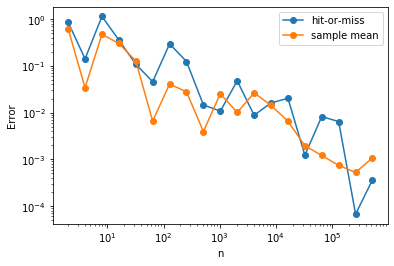

In [117]:
plt.loglog(N, Δhitormiss, 'o-', label='hit-or-miss')
plt.loglog(N, Δsamplemean, 'o-', label='sample mean')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()